### ICP04-Gradient Descent
Build upon the model fitting notebook created for WE01 part 2, specifically focusing on the third-order polynomial model. Update the notebook by incorporating another model, SGDGradientDescent, and comparing its performance to the standard linear regression techniques.

# Predictive Modeling Example2: Data Generation

This 'data gen' notebook follows the same sequence as the model1 data gen notebook. We will make a modification to the data generation process to create a more complex dataset. We will also add a number of new features to the dataset (x^2, x^3 and x^4). In the associated model fit notebook, we will then use a linear regression model as in model1 to see if the model can learn the new features.


## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

### WE02-Regression step 2: Update the data-generating notebook to generate data from a 3rd-order polynomial instead of the current 2nd-order polynomial. This modification will allow us to explore a more complex relationship between the input and output variables.

In [2]:
# our hidden relationship is a single input variable linear regression model
# this will be in the form of y = b0 + b1*x1 + b2*x2^2 + b3*x3^3
b0 = 0  # y intercept
b1 = -1 # slope for x1
b2 = 1 # slope for x2
b3 = 2 # slope for x3

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [3]:
sample_size = 1000

We need to create a set of X (input) values. These values are independent, so we could choose any set of X values we like. We could simply create a simple linear sequence, or we could create draw random values from a distribution (uniform, or gaussian (aka normal). Though it doesn't affect our outcome (we are going to use a linear model), we will draw from a normal distribution (we often find data is normally distributed).

In [4]:
# create a simple sequence of X values
#X = np.linspace(0, 100, sample_size) # https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace

# draw random samples from the uniform distribution
#X = np.random.uniform(low=0.0, high=100.0, size=sample_size) # uniform distribution # https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html#numpy.random.uniform

# draw samples from the normal distribution
x1 =  np.random.normal(loc=0.0, scale=10.0, size=sample_size) # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal

In [5]:
# create the x2
x2 = x1**2

In [6]:
# create X3
x3 = x1**3

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [7]:
y = b0 + b1 * x1 + b2 * x2 + b3 * x3

To make it easier to work with this data, let's store x1, x2, x3 and y into a single dataframe...

In [8]:
data = {'x1': x1, 'x2': x2, 'x3' : x3, 'y': y}  # this is a dictionary data structure; which consists of key-value pairs
# see lists_and_dictionaries.ipynb for more information on dictionaries (there are also many other resources online)

df = pd.DataFrame(data) # create a dataframe from the dictionary
# see more here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

df.head(n=5) # display the first 5 rows NOTE: The default is 5, but you can change it to any number you want.
# see more here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

,x1,x2,x3,y
0,16.243454,263.849786,4285.831767,8819.269866
1,-6.117564,37.424591,-228.947336,-414.352516
2,-5.281718,27.896540,-147.341644,-261.505031
3,-10.729686,115.126166,-1235.267642,-2344.679430
4,8.654076,74.893036,648.130052,1362.499063


Now, let's plot this data using a scatter plot.

Since x2 is simply the square of x1, we can display the relationship between x and y as follows:

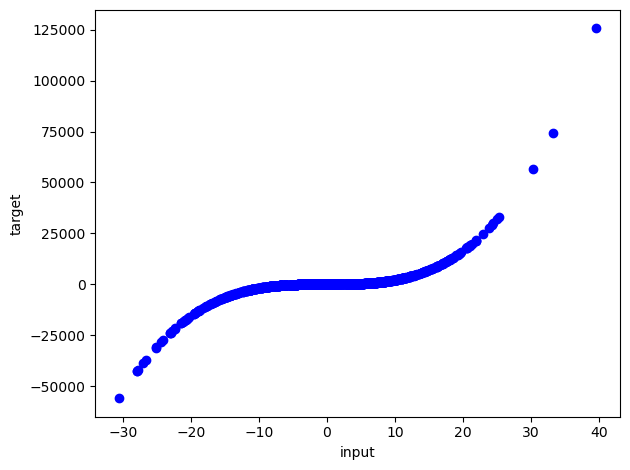

In [9]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x1, y, color='blue')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all... lt's fix that by adding some noise to the data.

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [10]:
e_mean = 0
e_stdev = 100
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

Question to ask yourself: 
    1. What is the effect of the standard deviation of the noise on the data? 
    2. What happens if you increase or decrease the standard deviation? 
    3. What happens if you change the mean of the noise? (we will discuss this in the associated video for this notebooke)

Now, let's look at a scatter plot of both the X and y data with the noise added in...

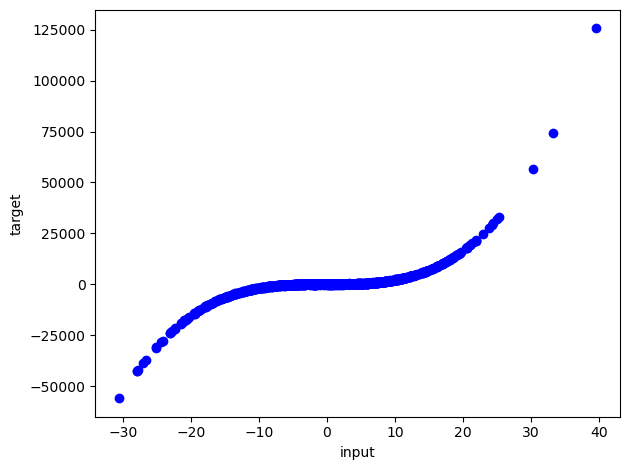

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x1, y, color='blue')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 5: Save our synthesized data to a file (we will save it as a csv file)

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv.  We will use the `pandas` library to do this.

First we will create a dataframe with the data we just similated...

In [12]:
df = pd.DataFrame({'input': x1, 'target': y}) # notice: I've not saved x2 in the dataframe. x2 is a derived feature we created to generate the polynomial relationship.
df.head(3)

,input,target
0,16.243454,8803.949866
1,-6.117564,-657.602516
2,-5.281718,-210.705031


Now, let's save the data we created to a csv file. 

In [13]:
df.to_csv('ICP04_dataset.csv', index=False) # NOTE: this is relative to the notebook location. Be sure to change this path to something that makes sense for your project.

## Conclusion

In this notebook, we've synthesized a multi-variable relationship consists of x1, x2, x3 and a target. This is a special case where x2, x3 is a function of x1 (x1 squared), (x1 cubed). What we've now created/simulated is a polynomial relationship (3rd order polynomial in this case) between x1 and y. 

In the associtated model fit notebook, we will attempt to fit the data (remember, in the fit notebook, we do not know what the original relationship is - we will use polynomial regression, SGD Gradient Descent to find it and which model is best).